# Analiza besedila na mojedelo.com

Avtor: Alja Dostal

Najprej prenesemo podatke iz interneta (tega ni potrebno zagnati, ker so podatki ze shranjeni lokalno).

In [28]:
import shrani

# shrani podatke iz interneta
shrani.save_web_data()

In [37]:
import obdelaj

# obdela shranjene podatke in jih zapise v csv datoteko
obdelaj.parse_data_to_csv()

Stevilo vseh sluzb 493


## Prikaz vhodnih podatkov

In [40]:
import pandas as pd

# prikazemo samo 10 vrstic
pd.set_option('display.min_rows', 10)

%matplotlib inline

# uvozimo sluzbe iz csv datoteke
sluzbe = pd.read_csv('obdelani/sluzbe.csv', index_col='ime')

In [41]:
sluzbe

,delodajalec,opis,kategorija,regija
ime,,,,
Poslovni tajnik,NLB d.d.,Ste pripravljeni na spremembo? Iščemo Poslovne...,bancnistvo-finance,osrednjeslovenska
Strokovni sodelavec v podpori kreditnega poslovanja,Gorenjska banka d.d. Kranj,Vaše glavne odgovornosti na tem delovnem mestu...,bancnistvo-finance,osrednjeslovenska
Strokovni sodelavec v kontaktnem centru,DELAVSKA HRANILNICA d.d. LJUBLJANA,V svoje vrste vabimo:STROKOVNEGA SODELAVCA V K...,bancnistvo-finance,osrednjeslovenska
Višji strokovni sodelavec na področju preprečevanja pranja denarja in financiranja terorizma,BKS Bank AG Bančna podruž,Vaše glavne delovne naloge in odgovornosti bod...,bancnistvo-finance,osrednjeslovenska
Samostojni strokovni delavec VII/1 (J017100) v Finančno računovodski službi,Univerza v Ljubljani Fakulteta za gradbeništv...,Opis dela in nalog: samostojno načrtuje in opr...,bancnistvo-finance,osrednjeslovenska
...,...,...,...,...
Analitik dela in časa,Bosch Rexroth d.o.o.,Naloge: določanje in izračunavanje časovnih no...,upravljanje-svetovanje-vodenje,gorenjska
Različni profili,LPP FASHION d.o.o.,V svojo sredino vabimo vse ki vas zanima moda...,upravljanje-svetovanje-vodenje,gorenjska
Team Lead - Support &amp; Monitoring,Manpower d.o.o.,Za našega naročnika uspešno mednarodno podjet...,upravljanje-svetovanje-vodenje,gorenjska


Uvozimo knjiznico za risanje grafov.

In [42]:
import matplotlib.pyplot as plt

Narisemo tortne diagrame za regije in kategorije.

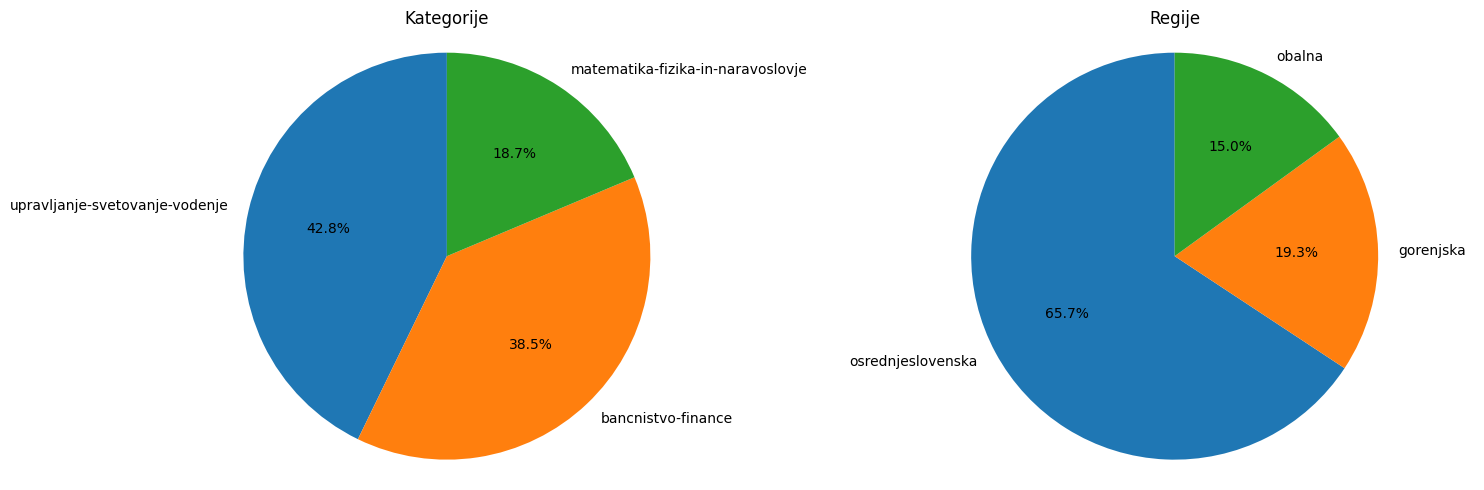

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# narisemo tortni diagram za kategorije
sluzbe['kategorija'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, ax=ax1)
ax1.set_title('Kategorije')
ax1.axis('equal')

# narisemo tortni diagram za regije
sluzbe['regija'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.set_title('Regije')
ax2.axis('equal')

ax1.set_ylabel('')
ax2.set_ylabel('')
plt.tight_layout()

plt.show()

Izberemo 10 najpogostejsih delodajalcev in narisemo histogram.

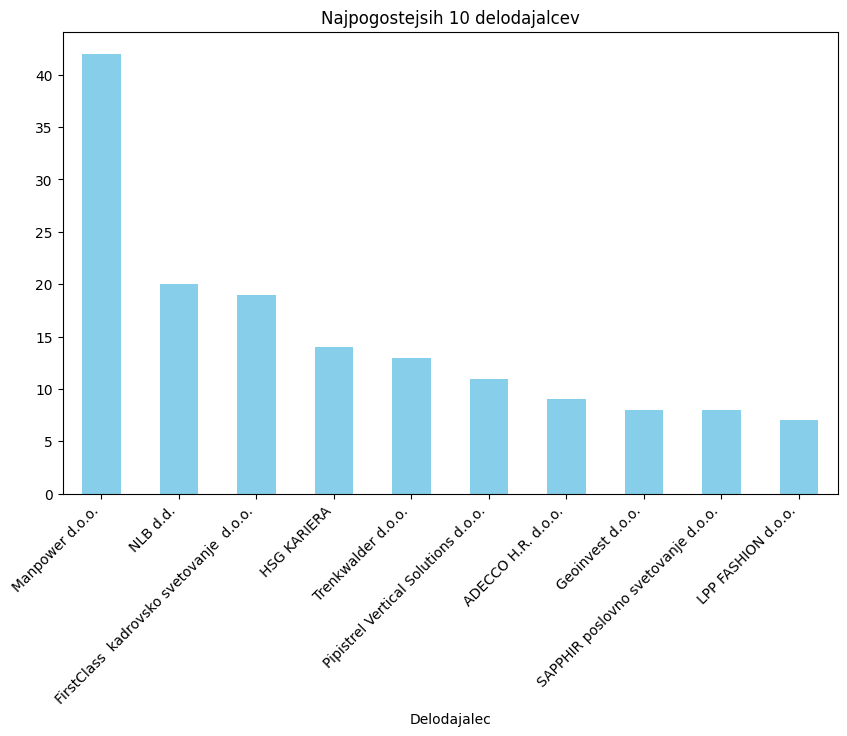

In [44]:
# izberemo 10 najpogostejsih delodajalcev
top_delodajalec = sluzbe['delodajalec'].value_counts().nlargest(10)

# narisemo histogram
plt.figure(figsize=(10, 6))
top_delodajalec.plot(kind='bar', color='skyblue')
plt.title('Najpogostejsih 10 delodajalcev')
plt.xlabel('Delodajalec')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

Prestejemo uporabo posamezne besede in za najpogosteje uporabljene narisemo histogram.

In [45]:
# slovar s pogostostjo posamezne besede
besede = {}

for index, sluzba in sluzbe.iterrows():
    # izbrisemo locila iz opisa
    opis = sluzba["opis"].replace("?", "").replace("!", "").replace(".", "")

    for beseda in opis.split(" "):
        if len(beseda) <= 3:
            # izlocimo besede, ki so krajse od 3 crk
            continue

        if beseda in besede:
            besede[beseda] += 1
        else:
            besede[beseda] = 1

# uredimo besede po najpogostejsi
besede_pari = []
for beseda, n in besede.items():
    besede_pari.append((-n, beseda))
besede_pari.sort()

besede_pari_urejeno = []
for n, beseda in besede_pari:
    besede_pari_urejeno.append((beseda, -n))

besede_pari_urejeno[:10]

[('iščemo', 97),
 ('podjetje', 89),
 ('delovno', 72),
 ('mesto', 72),
 ('delo', 71),
 ('naročnika', 57),
 ('našega', 57),
 ('področju', 56),
 ('mednarodno', 53),
 ('vodenje', 53)]

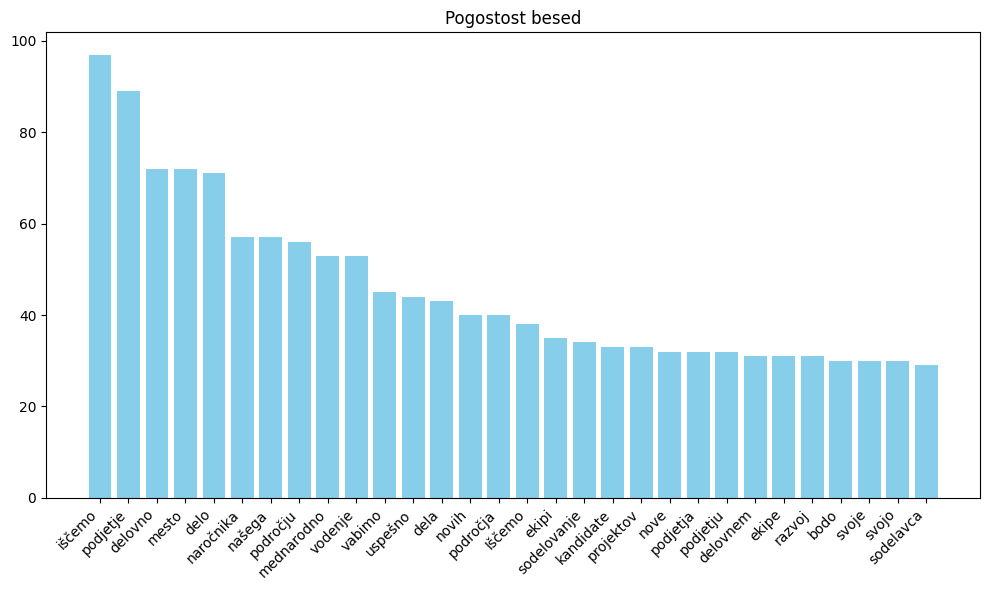

In [46]:
# za risanje histograma locimo besede in ponovitve na dva seznama
besede = []
ponovitve = []
for beseda, ponovitev in besede_pari_urejeno[:30]:
    besede.append(beseda)
    ponovitve.append(ponovitev)

# narisemo histogram
plt.figure(figsize=(10, 6))
plt.bar(besede, ponovitve, color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Pogostost besed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()